In [1]:
# 주피터 노트북 환경설정
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")

from IPython.core.display import display, HTML
# display(HTML("<style>.container { font-weight: bold !important; font-family:'Malgun Gothic' !important;}</style>"))
# display(HTML("<style>.container { font-weight: bold !important;}</style>"))
# display(HTML("<style>.container { width: 98% !important; }</style>"))

In [2]:
import numpy as np
import pandas as pd
import os

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("ggplot")
%matplotlib inline

# 관련 라이브러리 임포트 
import matplotlib.font_manager as fm

#  한글글꼴로 변경
# plt.rcParams['font.family'] = '한글글꼴명'
plt.rcParams['font.size'] = 11.0
# plt.rcParams['font.family'] = 'batang'
plt.rcParams['font.family'] = 'Malgun Gothic'

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
matplotlib.rcParams['axes.unicode_minus'] = False

# 그래프 기본 크기 설정 
plt.rcParams['figure.figsize'] = [10, 6]

# 다항 회귀(Polynomial regression)

- 2차 방정식 
$$ ax^2 + bx + c $$

In [3]:
from sklearn.preprocessing import PolynomialFeatures

In [4]:
print(dir(PolynomialFeatures))

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_check_n_features', '_combinations', '_get_param_names', '_get_tags', '_more_tags', '_repr_html_', '_repr_html_inner', '_repr_mimebundle_', '_validate_data', 'fit', 'fit_transform', 'get_feature_names', 'get_params', 'powers_', 'set_params', 'transform']


## PloynomialFeatures 테스트

In [5]:
X = np.arange(4).reshape(2,2)
print('일차 단항식 계수 feature:\n',X )

일차 단항식 계수 feature:
 [[0 1]
 [2 3]]


In [6]:
#PolynomialFeatures 객체 생성
poly = PolynomialFeatures(degree=2)
#입력데이터 전달
poly.fit(X)
#변형값을 변수에 저장
poly_ftr = poly.transform(X)
print('변환된 2차 다항식 계수 feature:\n', poly_ftr)


변환된 2차 다항식 계수 feature:
 [[1. 0. 1. 0. 0. 1.]
 [1. 2. 3. 4. 6. 9.]]


- [0 1] -> 1, x1, x2, x1^2, x1*x2, x2^2 -> [1, 0, 1, 0, 0, 1.]
- [2 3] -> 1, x1, x2, x1^2, x1*x2, x2^2 -> [1, 2, 3, 4, 6, 9.]

In [7]:
X = np.arange(4).reshape(2,2)
print('일차 단항식 계수 feature:\n',X )


poly = PolynomialFeatures(degree=3)
poly.fit(X)
poly_ftr = poly.transform(X)
print('변환된 2차 다항식 계수 feature:\n', poly_ftr)


일차 단항식 계수 feature:
 [[0 1]
 [2 3]]
변환된 2차 다항식 계수 feature:
 [[ 1.  0.  1.  0.  0.  1.  0.  0.  0.  1.]
 [ 1.  2.  3.  4.  6.  9.  8. 12. 18. 27.]]


In [8]:
print(poly.get_feature_names())

['1', 'x0', 'x1', 'x0^2', 'x0 x1', 'x1^2', 'x0^3', 'x0^2 x1', 'x0 x1^2', 'x1^3']


- [0 1] -> 1, x0, x1, x0^2, x0*x1, x1^2, x0^3, x0^2*1, x0x1^2, x1^3 -> [1, 0, 1, 0, 0, 1. 0. 0. 0. 1.]
- [2 3] -> 1, x0, x1, x0^2, x0*x1, x1^2, x0^3, x0^2*1, x0x1^2, x1^3 -> [1, 2, 3, 4, 6, 9. 8. 12. 18. 27.]

# 농어의 길이와 무게

#### 데이타준비  http://bit.ly/perch_data

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [10]:
perch_length = np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
     ).reshape(-1, 1)

perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
     1000.0, 1000.0]
     ).reshape(-1, 1)

In [11]:
perch_length.ndim, perch_weight.ndim, perch_length.shape, perch_weight.shape

(2, 2, (56, 1), (56, 1))

In [12]:
print(perch_length[:3])
print()
print(perch_weight[:3])

[[ 8.4]
 [13.7]
 [15. ]]

[[ 5.9]
 [32. ]
 [40. ]]


In [13]:
#학습, 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(perch_length, perch_weight, random_state=42)
X_train.shape, X_test.shape

((42, 1), (14, 1))

In [14]:
#2차식 X_train**2 새로운 컬럼으로 생성해서 추가
#np.column_stack((넘파이배열1, 넘파이배열2))
X_train_poly = np.column_stack((X_train**2, X_train))
X_test_poly = np.column_stack((X_test**2, X_test))

In [15]:
print(X_train_poly.shape, X_test_poly.shape)

(42, 2) (14, 2)


In [16]:
#길이*길이, 길이
X_train_poly[:3]

array([[384.16,  19.6 ],
       [484.  ,  22.  ],
       [349.69,  18.7 ]])

In [17]:
#길이*길이, 길이
X_test_poly[:3]

array([[ 70.56,   8.4 ],
       [324.  ,  18.  ],
       [756.25,  27.5 ]])

In [18]:
#모델 생성
model_lr = LinearRegression()
model_lr.fit(X_train_poly, y_train)

#길이가 50인 농어의 무게는?
print(model_lr.predict([[50**2, 50]]))

[[1573.98423528]]


In [19]:
print(model_lr.coef_, model_lr.intercept_)

[[  1.01433211 -21.55792498]] [116.05021078]


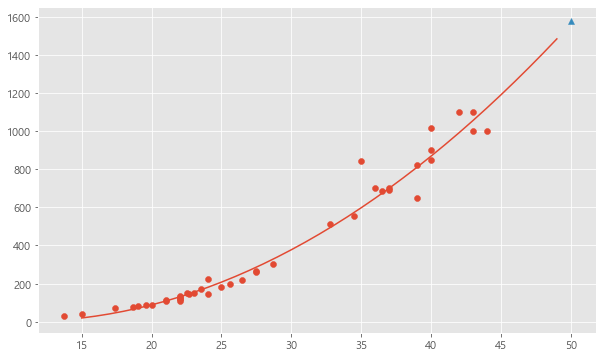

In [20]:
#시각화
point = np.arange(15, 50)

#학습데이터 전체
plt.scatter(X_train, y_train)

#회귀식
plt.plot(point, 1.01*point**2 - 21.6*point + 116.05)

#길이 50일 때 농어의 무게 -> 1574
plt.scatter([50], [1574], marker='^')
plt.show()

In [21]:
print(model_lr.score(X_train_poly, y_train))
print(model_lr.score(X_test_poly, y_test))

0.9706807451768623
0.9775935108325121
